# synpuf disclosure risk

Compare synthetic PUFs trained from a 50% sample, both to the training set and the remaining 50% holdout. Synthetic file (1) is from synthimpute random forests; (2) is from the synthpop R package.

## Setup

### Imports

In [1]:
import pandas as pd
import numpy as np
import synthimpute as si
from scipy import stats

import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter

### Graphing

In [2]:
# !wget https://github.com/MaxGhenis/random/raw/master/Roboto-Regular.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
# mpl.font_manager._rebuild()

In [3]:
sns.set_style('white')
DPI = 200
mpl.rc('savefig', dpi=DPI)
mpl.rcParams['figure.dpi'] = DPI
mpl.rcParams['figure.figsize'] = 6.4, 4.8  # Default.
mpl.rcParams['font.sans-serif'] = 'Roboto'
mpl.rcParams['font.family'] = 'sans-serif'

# Set title text color to dark gray (https://material.io/color) not black.
TITLE_COLOR = '#212121'
mpl.rcParams['text.color'] = TITLE_COLOR

# Axis titles and tick marks are medium gray.
AXIS_COLOR = '#757575'
mpl.rcParams['axes.labelcolor'] = AXIS_COLOR
mpl.rcParams['xtick.color'] = AXIS_COLOR
mpl.rcParams['ytick.color'] = AXIS_COLOR

### Load data

In [4]:
rf_synth = pd.read_csv('~/Downloads/puf_synth_50p_sample.csv')
synthpop = pd.read_csv('~/Downloads/puf_synthpop_50p_sample.csv')
train = pd.read_csv('~/Downloads/puf_50p_sample_train.csv')
test = pd.read_csv('~/Downloads/puf_50p_sample_test.csv')
nearest_rf = pd.read_csv('~/Downloads/nearest_rf_50p.csv')
nearest_synthpop = pd.read_csv('~/Downloads/nearest_synthpop_50p.csv')

## Examine results

In [5]:
nearest_rf.sort_values('train_dist').head()

,synth_id,train_id,train_dist,test_id,test_dist,dist_diff,dist_ratio
14897,28281,3243,0.0,234,0.000010,-0.000010,0.0
9543,43597,61605,0.0,31608,0.516966,-0.516966,0.0
1824,33425,28788,0.0,24877,0.000000,0.000000,NaN
1823,58846,12991,0.0,5831,0.000000,0.000000,NaN
4360,65112,26241,0.0,44923,0.000105,-0.000105,0.0


In [6]:
nearest_rf.sort_values('dist_diff').head()

,synth_id,train_id,train_dist,test_id,test_dist,dist_diff,dist_ratio
1193,71887,80041,14.591082,54459,69.193078,-54.601996,0.210875
13498,20202,15591,6.550347,31682,58.392929,-51.842582,0.112177
7656,23190,57021,21.989984,30684,65.833228,-43.843244,0.334026
7174,74827,73426,7.763416,43893,49.744476,-41.981061,0.156066
3338,72476,57021,57.670331,7651,85.985342,-28.315011,0.670700


In [7]:
nearest_synthpop.sort_values('train_dist').head()

,synth_id,train_id,train_dist,test_id,test_dist,dist_diff,dist_ratio
15365,69661,2343,0.0,52579,0.000765,-0.000765,0.0
12667,28695,956,0.0,8332,0.000000,0.000000,NaN
13754,20788,56488,0.0,64760,0.000044,-0.000044,0.0
11307,18101,16083,0.0,3523,0.000000,0.000000,NaN
1631,81002,29949,0.0,49155,0.000000,0.000000,NaN


## Analysis

In [8]:
nearest_rf[['train_dist', 'test_dist', 'dist_diff']].describe()

,train_dist,test_dist,dist_diff
count,16379.000000,16379.000000,16379.000000
mean,1.087607,1.190001,-0.102394
std,2.663313,3.038475,1.038284
min,0.000000,0.000000,-54.601996
25%,0.011631,0.024910,-0.082250
50%,0.230529,0.288893,-0.000840
75%,1.185236,1.308847,0.014547
max,81.289458,86.606983,6.566096


In [9]:
nearest_synthpop[['train_dist', 'test_dist', 'dist_diff']].describe()

,train_dist,test_dist,dist_diff
count,16379.000000,16379.000000,16379.000000
mean,1.199894,1.272387,-0.072493
std,2.843127,3.578149,1.896865
min,0.000000,0.000000,-130.601932
25%,0.062431,0.065847,-0.052594
50%,0.390128,0.401151,-0.000006
75%,1.402324,1.418562,0.034103
max,114.098050,135.849491,10.423445


In [10]:
stats.ttest_1samp(nearest_rf.dist_diff, 0)

Ttest_1sampResult(statistic=-12.621306471184228, pvalue=2.3790242436364837e-36)

In [11]:
stats.ttest_1samp(nearest_synthpop.dist_diff, 0)

Ttest_1sampResult(statistic=-4.891033349137688, pvalue=1.0125989060220151e-06)

## Charts

### Scatterplots of distance to train and to test

Note we can't use log scales because of the exact zeros.

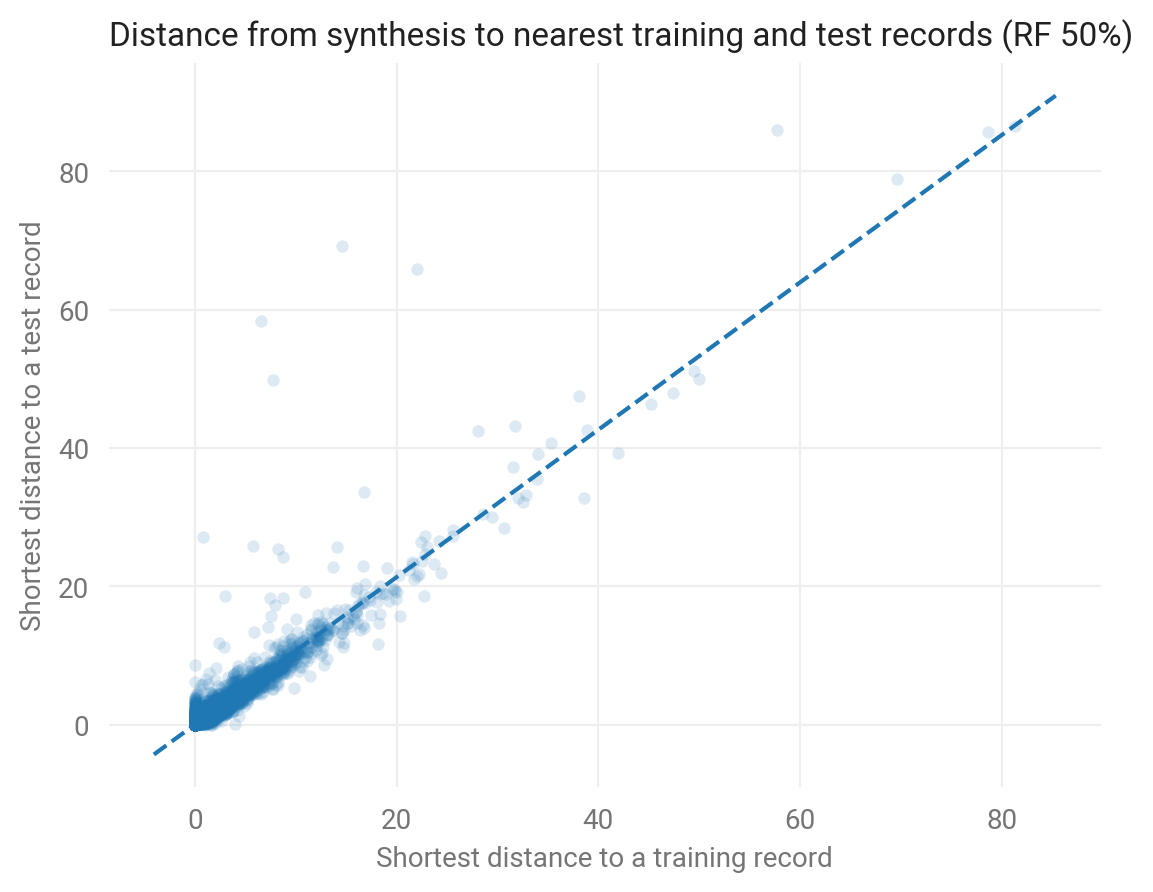

In [12]:
ax = nearest_rf.plot.scatter('train_dist', 'test_dist', alpha=0.15, linewidths=0.0)
# 45-degree line.
ax.plot(ax.get_xlim(), ax.get_ylim(), ls='--')
sns.despine(left=True, bottom=True)
ax.grid(color='#eeeeee')
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
ax.set(xlabel='Shortest distance to a training record',
       ylabel='Shortest distance to a test record')
plt.title('Distance from synthesis to nearest training and test records (RF 50%)',
          loc='left')
plt.show()

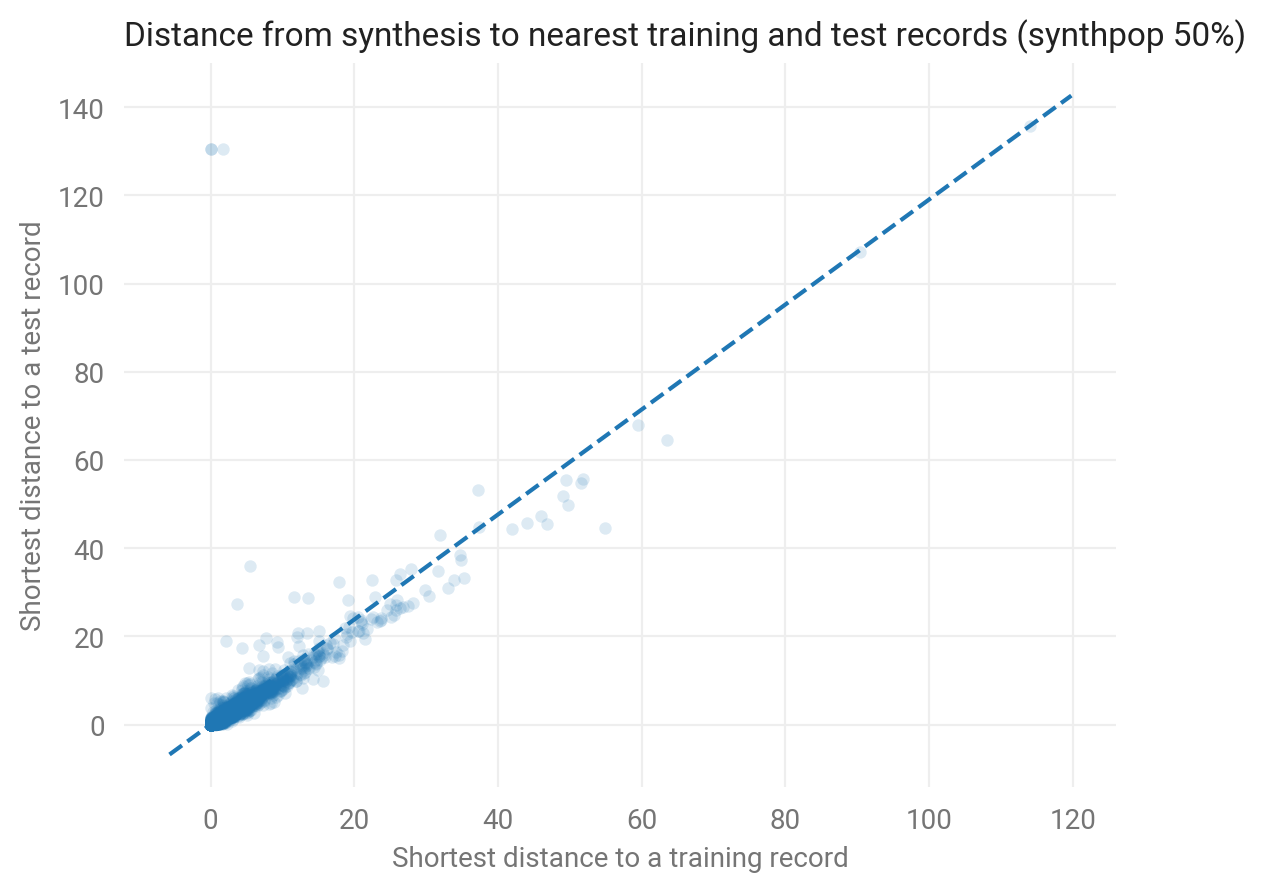

In [13]:
ax = nearest_synthpop.plot.scatter('train_dist', 'test_dist', alpha=0.15, linewidths=0.0)
# 45-degree line.
ax.plot(ax.get_xlim(), ax.get_ylim(), ls='--')
sns.despine(left=True, bottom=True)
ax.grid(color='#eeeeee')
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
ax.set(xlabel='Shortest distance to a training record',
       ylabel='Shortest distance to a test record')
plt.title('Distance from synthesis to nearest training and test records (synthpop 50%)',
          loc='left')
plt.show()

### Boxplot of distances

In [14]:
distances_stacked = pd.DataFrame({
    'type': 'train',
    'model': 'RF',
    'dist': nearest_rf.train_dist
}).append(pd.DataFrame({
    'type': 'test',
    'model': 'RF',
    'dist': nearest_rf.test_dist
})).append(pd.DataFrame({
    'type': 'train',
    'model': 'synthpop',
    'dist': nearest_synthpop.train_dist
})).append(pd.DataFrame({
    'type': 'test',
    'model': 'synthpop',
    'dist': nearest_synthpop.test_dist
}))

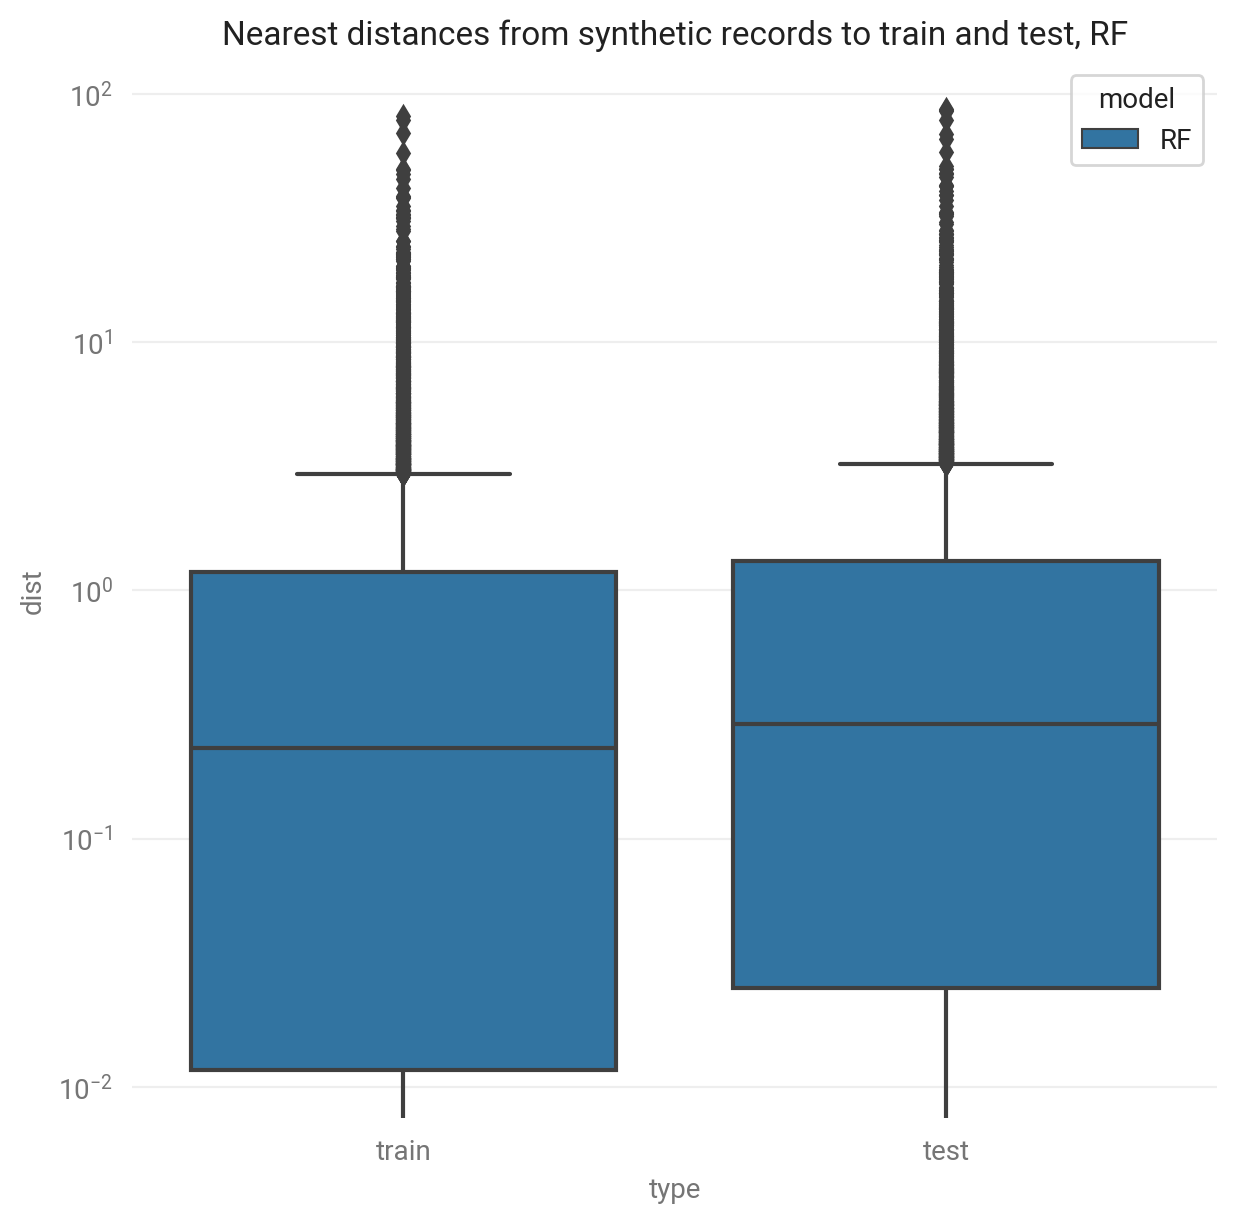

In [25]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale='log')
sns.boxplot(x='type', y='dist', hue='model',
            data=distances_stacked[distances_stacked.model == 'RF'])
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color='#eeeeee')
plt.title('Nearest distances from synthetic records to train and test, RF')
plt.show()

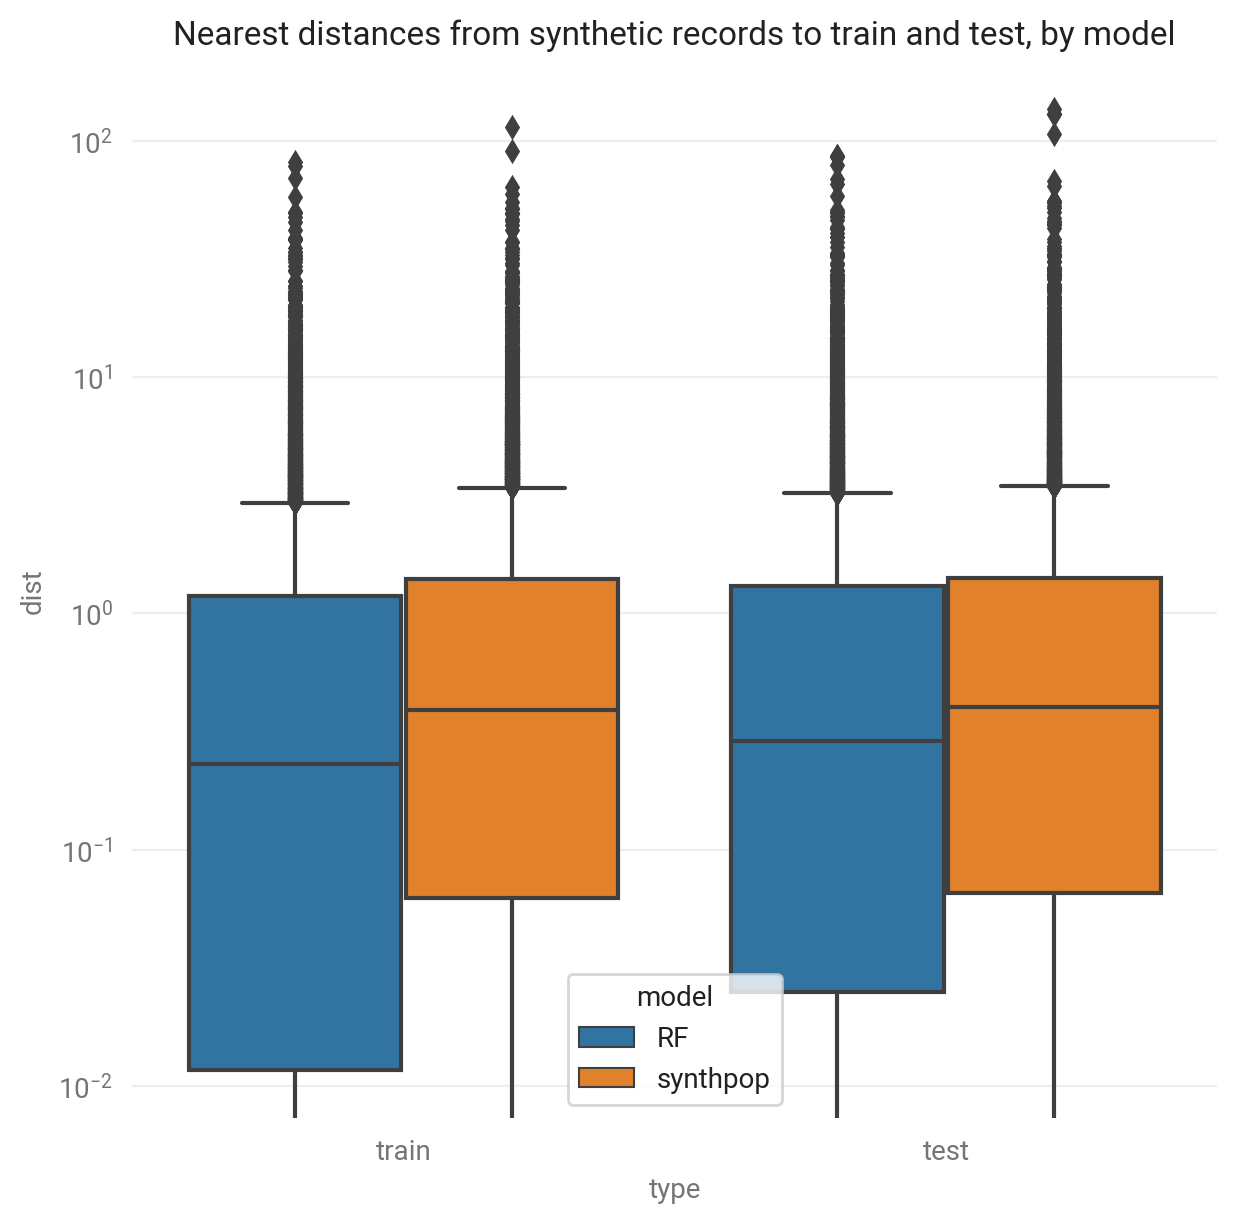

In [15]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale='log')
sns.boxplot(x='type', y='dist',
            hue='model', data=distances_stacked)
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color='#eeeeee')
plt.title('Nearest distances from synthetic records to train and test, by model')
plt.show()

### CDFs of distances

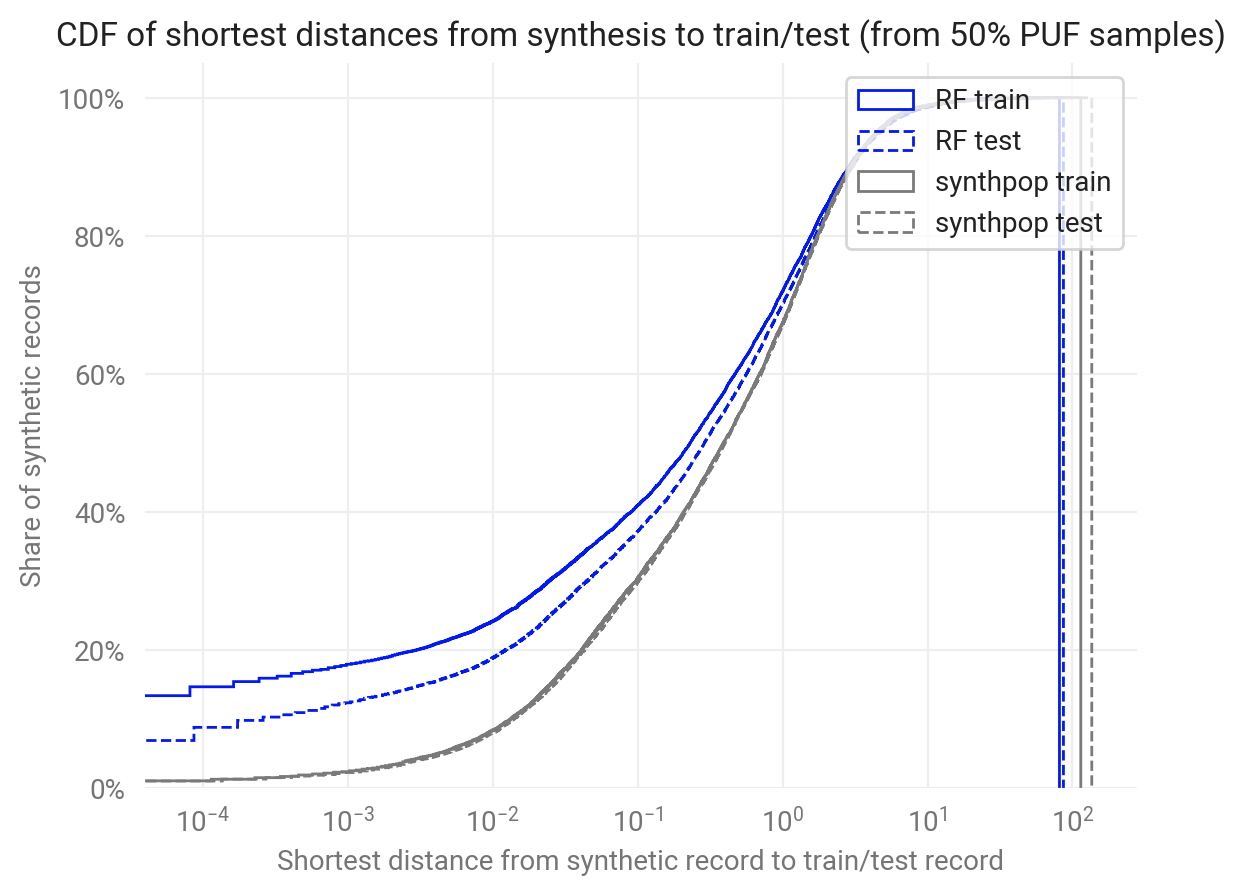

In [16]:
# Plot the four series.
BINS = 1000000
ax = nearest_rf.train_dist.hist(cumulative=True, density=1, bins=BINS, color='#021aee', histtype='step')
nearest_rf.test_dist.hist(cumulative=True, density=1, bins=BINS, histtype='step', color='#021aee', ls='--')
nearest_synthpop.train_dist.hist(cumulative=True, density=1, bins=BINS, histtype='step', color='#7a7a7a')
nearest_synthpop.test_dist.hist(cumulative=True, density=1, bins=BINS, histtype='step', color='#7a7a7a', ls='--')
# Formatting.
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
    lambda y, _: '{:.0%}'.format(y)))
ax.grid(color='#eeeeee')
sns.despine(left=True, bottom=True)
plt.xscale('log')
plt.legend(['RF train', 'RF test', 'synthpop train', 'synthpop test'])
ax.set(xlabel='Shortest distance from synthetic record to train/test record',
       ylabel='Share of synthetic records')
plt.title('CDF of shortest distances from synthesis to train/test (from 50% PUF samples)')
plt.show()

### Exact matches

In [17]:
exact_matches = pd.DataFrame({
    'type': ['train', 'train', 'test', 'test'],
    'model': ['RF', 'synthpop', 'RF', 'synthpop'],
    'share_exact': [(nearest_rf.train_dist == 0).mean(),
                    (nearest_synthpop.train_dist == 0).mean(),
                    (nearest_rf.test_dist == 0).mean(),
                    (nearest_synthpop.test_dist == 0).mean()]})
exact_matches

,type,model,share_exact
0,train,RF,0.101166
1,train,synthpop,0.006350
2,test,RF,0.036022
3,test,synthpop,0.005434


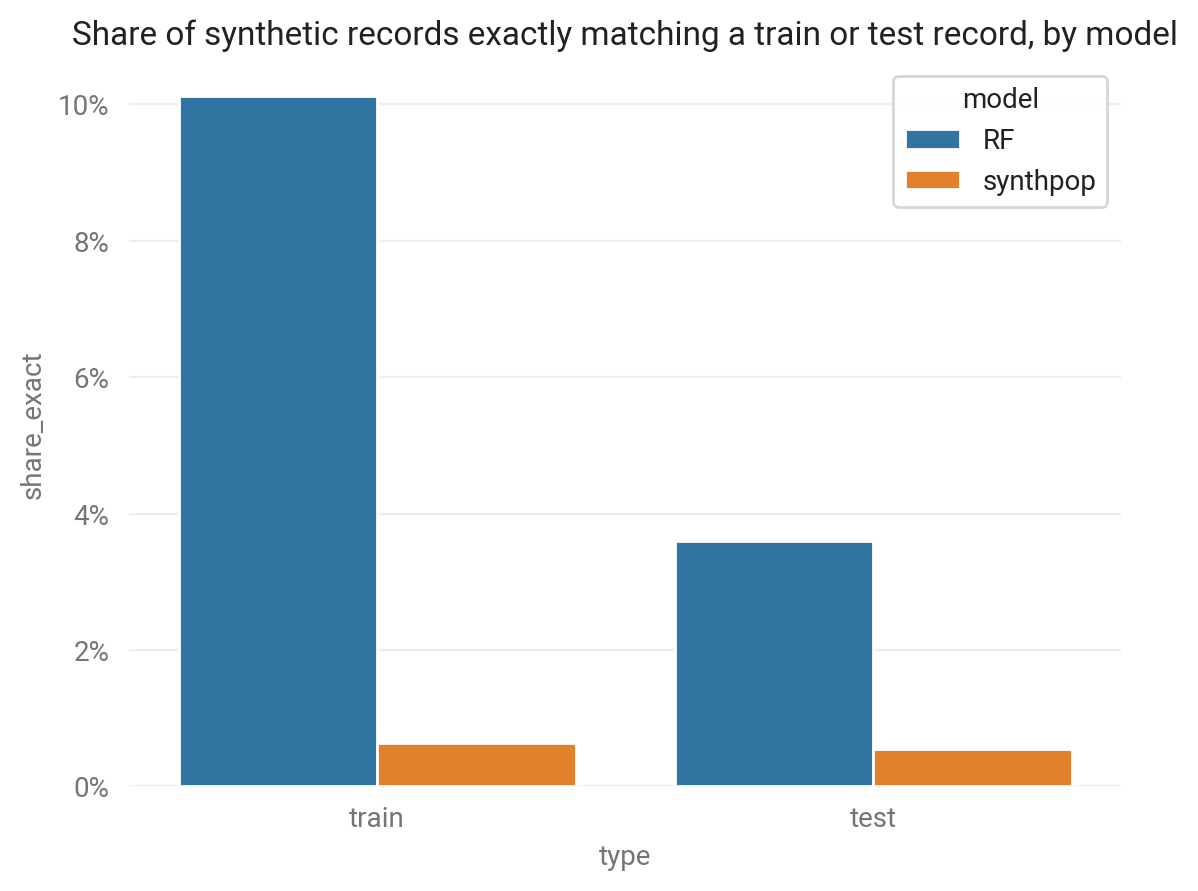

In [18]:
ax = sns.barplot(x='type', y='share_exact', hue='model', data=exact_matches)
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color='#eeeeee')
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
    lambda y, _: '{:.0%}'.format(y)))
plt.title('Share of synthetic records exactly matching a train or test record, by model')
plt.show()

In [19]:
exact_matches_bool = pd.DataFrame({
    'type': 'train',
    'model': 'RF',
    'share_exact': (nearest_rf.train_dist == 0)
}).append(pd.DataFrame({
    'type': 'test',
    'model': 'RF',
    'share_exact': (nearest_rf.test_dist == 0)
})).append(pd.DataFrame({
    'type': 'train',
    'model': 'synthpop',
    'share_exact': (nearest_synthpop.train_dist == 0)
})).append(pd.DataFrame({
    'type': 'test',
    'model': 'synthpop',
    'share_exact': (nearest_synthpop.test_dist == 0)
}))

/home/maxghenis/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


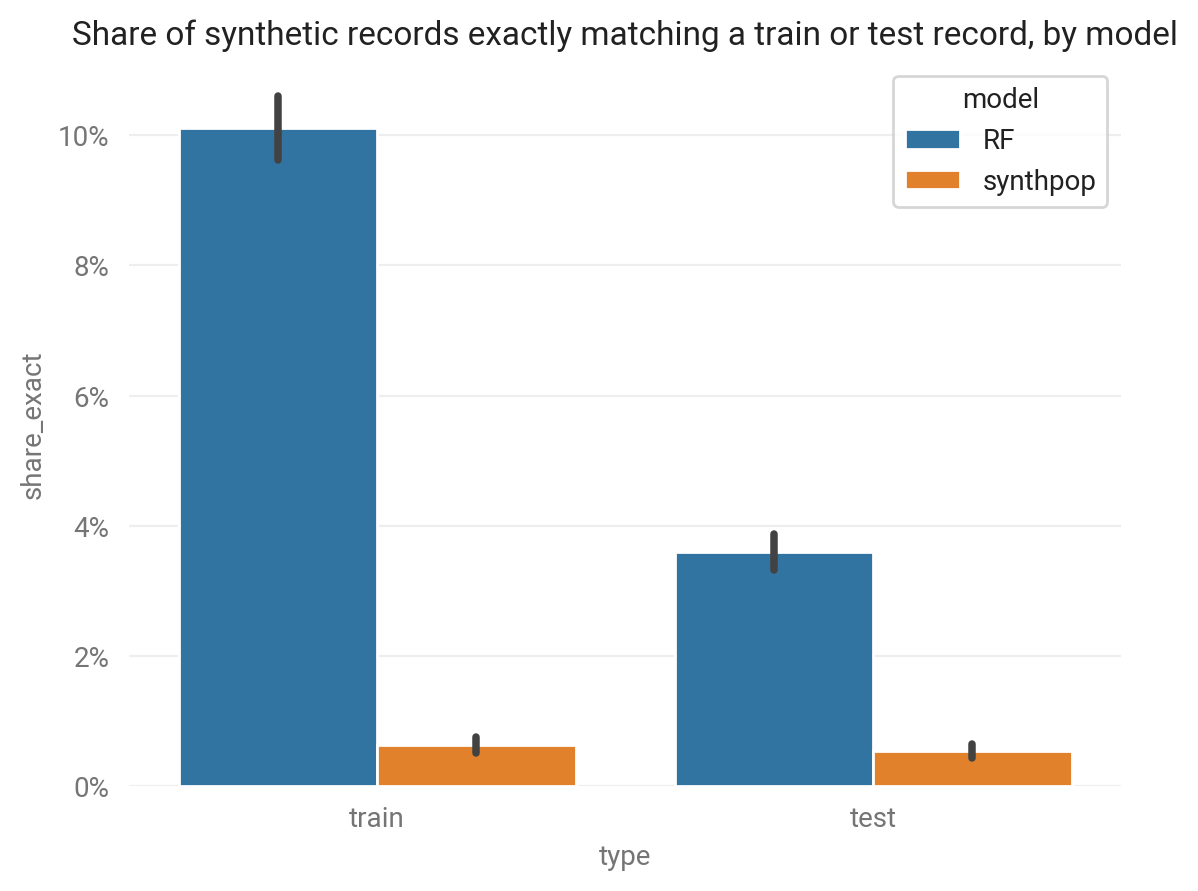

In [20]:
ax = sns.barplot(x='type', y='share_exact', hue='model', data=exact_matches_bool)
sns.despine(left=True, bottom=True)
ax.yaxis.grid(color='#eeeeee')
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
    lambda y, _: '{:.0%}'.format(y)))
plt.title('Share of synthetic records exactly matching a train or test record, by model')
plt.show()

What share of exact matches to train also exactly matched a test?

In [21]:
def share_exact_matches(df):
    exact_train = df[df.train_dist == 0]
    return((exact_train.test_dist == 0).sum() / exact_train.shape[0])

share_exact_matches(nearest_rf)

0.3385636692818346

In [22]:
share_exact_matches(nearest_synthpop)

0.7403846153846154